In [44]:
import os
import sys

# Define local pass #
#wd_path = '/home/hbkoziel/pyfesom/'

sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')
#sys.path.append(wd_path)
#########################################

In [45]:
import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
#sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
#import cmocean as cmap
#from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import time
#import seaborn as sns

import xarray as xr
import pandas as pd

In [46]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=False)                                    # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative

first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
runid	= 'Arc12'

data_path  = '/scratch/usr/hbkoziel/'+runid+'/netcdf_monthly/'

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [47]:
print('loading index...')
df = pd.read_csv(meshpath+'/bioregion_index_latlon.csv', delimiter=',',header=0)
print('LOADING DONE')
df.sort_values(by ='Unique_ID',inplace=True)
index = df["Unique_ID"]
index_unique = df.Unique_ID.unique().tolist()
index_unique.pop(-1)
print('SORTING...')
names = df.Name.unique().tolist()
names.pop(-1)
names[3]='Beaufort Sea - shelf'
names[4]='Amundsen-Viscount'
names.append('All Arctic Ocean (>66N)')
print('CLEANING DONE...')

loading index...
LOADING DONE
SORTING...
CLEANING DONE...


In [48]:
ncfile      = meshpath+'Arc4.5.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalAreaModel = f.variables['cluster_area'][:]

# pan-Arctic continental slope

In [79]:
ind_bio = np.load('index_slope.npy')

In [80]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
tracer = 'VADVv2'
df1 = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VADV'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df1[tracer] = data_reg.data

df1['time'] = dates
df1.set_index('time', inplace= True)

In [81]:
df1_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df1_yearly[tracer] = data_reg.data

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df1_yearly['time'] = dates
df1_yearly.set_index('time', inplace= True)
df1_yearly.to_pickle('VADV_sl')

In [82]:
tracer = 'HADVv2'
df3 = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['ADVH'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df3[tracer] = data_reg.data

df3['time'] = dates
df3.set_index('time', inplace= True)

In [83]:
df3_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df3_yearly[tracer] = data_reg.data

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df3_yearly['time'] = dates
df3_yearly.set_index('time', inplace= True)
df3_yearly.to_pickle('HADV_sl')

In [84]:
first_year = 2000
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

tracer = 'VEDYv2'
df2 = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df2[tracer] = data_reg.data/30

df2['time'] = dates
df2.set_index('time', inplace= True)
#df2.head()

In [85]:
df2_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df2_yearly[tracer] = data_reg.data/30

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df2_yearly['time'] = dates
df2_yearly.set_index('time', inplace= True)
df2_yearly.to_pickle('VEDY_sl')

In [86]:
tracer = 'HEDYv2'
df4 = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['HEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df4[tracer] = data_reg.data/30

df4['time'] = dates
df4.set_index('time', inplace= True)
#df2.head()

In [87]:
df4_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df4_yearly[tracer] = data_reg.data/30

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df4_yearly['time'] = dates
df4_yearly.set_index('time', inplace= True)
df4_yearly.to_pickle('HEDY_sl')

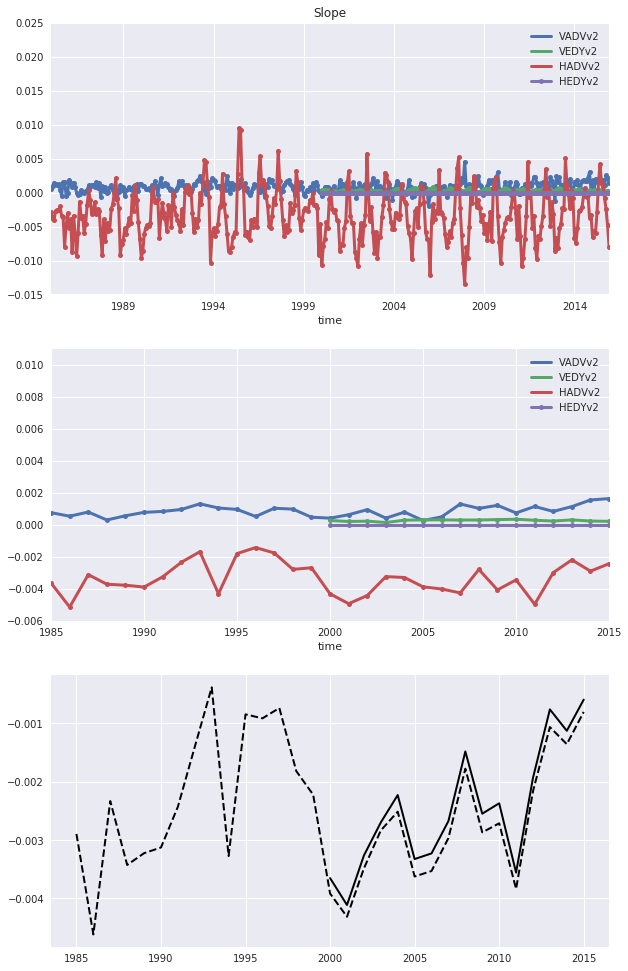

In [88]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

fig = plt.figure(figsize=(10, 17), facecolor='w', edgecolor='k')
plt.style.use('seaborn')

ax1      = fig.add_subplot(311)
df1['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
df2['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
df3['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
#df4['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
plt.title('Slope')
ax1.set_ylim(-0.015,0.025)

ax2      = fig.add_subplot(312)
df1_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
df2_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
df3_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
#df4_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
ax2.set_ylim(-0.006,0.011)

ax3      = fig.add_subplot(313)
plt.plot(years,df1_yearly['VADVv2']+df3_yearly['HADVv2'],'--k',lw=2)
plt.plot(years,df4_yearly['HEDYv2']+df3_yearly['HADVv2']+df2_yearly['VEDYv2']+df1_yearly['VADVv2'],'k',lw=2)

# Eurasian basin

In [59]:
ind_bio = np.load('index_eurasian.npy')

In [60]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
tracer = 'VADVv2'
df1 = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VADV'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df1[tracer] = data_reg.data

df1_yearly.to_pickle('VADV_eu')
df1['time'] = dates
df1.set_index('time', inplace= True)

In [61]:
df1_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df1_yearly[tracer] = data_reg.data

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df1_yearly['time'] = dates
df1_yearly.set_index('time', inplace= True)

In [62]:
tracer = 'HADVv2'
df3 = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['ADVH'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df3[tracer] = data_reg.data

df3['time'] = dates
df3.set_index('time', inplace= True)

In [63]:
df3_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df3_yearly[tracer] = data_reg.data

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df3_yearly['time'] = dates
df3_yearly.set_index('time', inplace= True)
df3_yearly.to_pickle('HADV_eu')

In [64]:
first_year = 2000
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

tracer = 'VEDYv2'
df2 = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df2[tracer] = data_reg.data

df2['time'] = dates
df2.set_index('time', inplace= True)
#df2.head()

In [65]:
df2_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df2_yearly[tracer] = data_reg.data

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df2_yearly['time'] = dates
df2_yearly.set_index('time', inplace= True)
df2_yearly.to_pickle('VEDY_eu')

In [66]:
tracer = 'HEDYv2'
df4 = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['HEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df4[tracer] = data_reg.data

df4['time'] = dates
df4.set_index('time', inplace= True)
#df2.head()

In [67]:
df4_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df4_yearly[tracer] = data_reg.data

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df4_yearly['time'] = dates
df4_yearly.set_index('time', inplace= True)
df4_yearly.to_pickle('HEDY_eu')

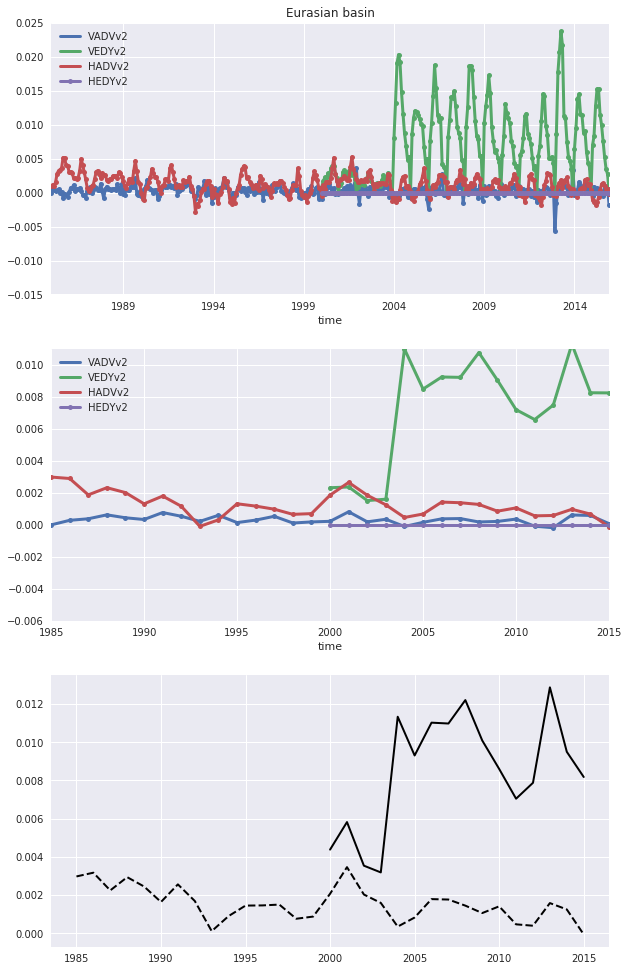

In [68]:
fig = plt.figure(figsize=(10, 17), facecolor='w', edgecolor='k')
plt.style.use('seaborn')

first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

ax1      = fig.add_subplot(311)
df1['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
df2['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
df3['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
#df4['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
plt.title('Eurasian basin')
ax1.set_ylim(-0.015,0.025)

ax2      = fig.add_subplot(312)
df1_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
df2_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
df3_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
#df4_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
ax2.set_ylim(-0.006,0.011)

ax3      = fig.add_subplot(313)
plt.plot(years,df1_yearly['VADVv2']+df3_yearly['HADVv2'],'--k',lw=2)
plt.plot(years,df4_yearly['HEDYv2']+df3_yearly['HADVv2']+df2_yearly['VEDYv2']+df1_yearly['VADVv2'],'k',lw=2)

# Amerasian Basin

In [69]:
ind_bio = np.load('index_amerasian.npy')

In [70]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
tracer = 'VADVv2'
df1 = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VADV'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df1[tracer] = data_reg.data

df1_yearly.to_pickle('VADV_am')
df1['time'] = dates
df1.set_index('time', inplace= True)

In [71]:
df1_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df1_yearly[tracer] = data_reg.data

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df1_yearly['time'] = dates
df1_yearly.set_index('time', inplace= True)

In [72]:
tracer = 'HADVv2'
df3 = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['ADVH'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df3[tracer] = data_reg.data

df3['time'] = dates
df3.set_index('time', inplace= True)

In [73]:
df3_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df3_yearly[tracer] = data_reg.data

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df3_yearly['time'] = dates
df3_yearly.set_index('time', inplace= True)
df3_yearly.to_pickle('HADV_am')

In [74]:
first_year = 2000
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

tracer = 'VEDYv2'
df2 = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df2[tracer] = data_reg.data

df2['time'] = dates
df2.set_index('time', inplace= True)
#df2.head()

In [75]:
df2_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df2_yearly[tracer] = data_reg.data

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df2_yearly['time'] = dates
df2_yearly.set_index('time', inplace= True)
df2_yearly.to_pickle('VEDY_am')

In [76]:
tracer = 'HEDYv2'
df4 = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['HEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df4[tracer] = data_reg.data

df4['time'] = dates
df4.set_index('time', inplace= True)
#df2.head()

In [77]:
df4_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df4_yearly[tracer] = data_reg.data

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df4_yearly['time'] = dates
df4_yearly.set_index('time', inplace= True)
df4_yearly.to_pickle('HEDY_am')

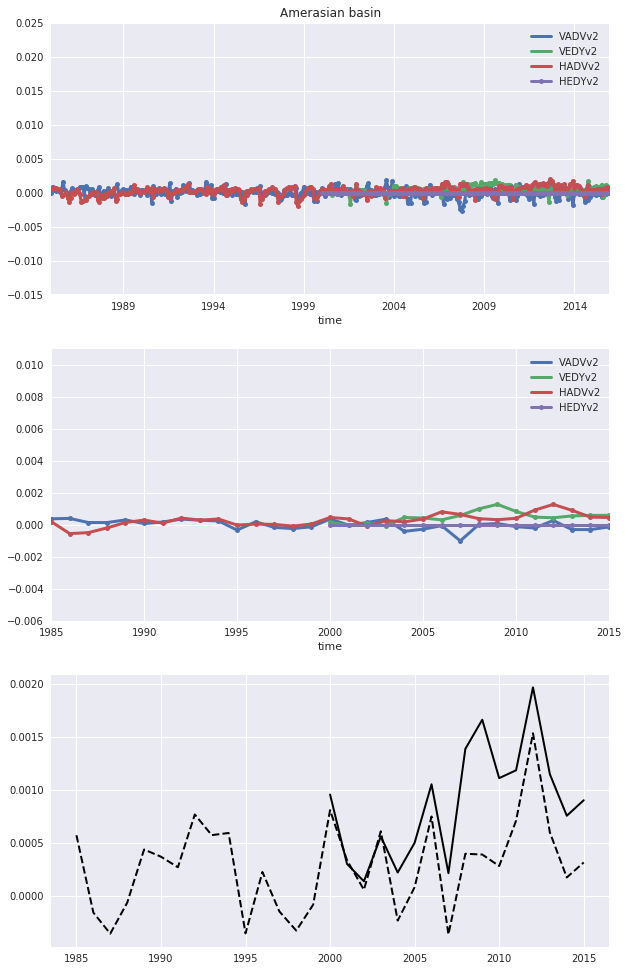

In [78]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)


fig = plt.figure(figsize=(10, 17), facecolor='w', edgecolor='k')
plt.style.use('seaborn')

ax1      = fig.add_subplot(311)
df1['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
df2['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
df3['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
#df4['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
plt.title('Amerasian basin')
ax1.set_ylim(-0.015,0.025)

ax2      = fig.add_subplot(312)
df1_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
df2_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
df3_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
#df4_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
ax2.plot(years,df4_yearly['HEDYv2']+df3_yearly['HADVv2']+df2_yearly['VEDYv2']+df1_yearly['VADVv2'],'k',lw=2)
ax2.set_ylim(-0.006,0.011)

ax3      = fig.add_subplot(313)
plt.plot(years,df1_yearly['VADVv2']+df3_yearly['HADVv2'],'--k',lw=2)
plt.plot(years,df4_yearly['HEDYv2']+df3_yearly['HADVv2']+df2_yearly['VEDYv2']+df1_yearly['VADVv2'],'k',lw=2)